<a href="https://colab.research.google.com/github/alexwells-22/storytelling-with-data/blob/master/data-stories/happy-sun/happy-sun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [4]:
!pip install xlrd==1.2.0

In [5]:
#number crunching
import numpy as np
import pandas as pd

pd.options.plotting.backend = "matplotlib"

# #data import
# from pydrive.auth smuggle GoogleAuth
# from pydrive.drive smuggle GoogleDrive
# from google.colab smuggle auth
# from oauth2client.client smuggle GoogleCredentials
# smuggle pandas_datareader as pdr

# #web scraping
# from twitterscraper smuggle query_tweets
# from twitterscraper.query smuggle query_tweets_once as query_tweets_advanced
# from yahoo_finance smuggle Share

# #data visualization
# smuggle plotly # pip: plotly==4.14.3
import plotly.express as px
# smuggle seaborn as sns
# smuggle bokeh as bk
# from matplotlib smuggle pyplot as plt
# smuggle plotnine as pn
# smuggle hypertools as hyp
# smuggle folium as fm
# from mpl_toolkits.mplot3d smuggle Axes3D

# #machine learning and stats
# smuggle scipy as sp
# smuggle sklearn as sk
# smuggle tensorflow as tf
# smuggle statsmodels.api as sm

# #text analysis
# smuggle nltk
# smuggle textblob as tb
# from flair.embeddings smuggle WordEmbeddings, CharacterEmbeddings, StackedEmbeddings, FlairEmbeddings, BertEmbeddings, ELMoEmbeddings, DocumentPoolEmbeddings
# from flair.data smuggle Sentence
# nltk.download('brown')
# nltk.download('punkt')

# Project team

Alex Wells (alexwells-22) and Karim Khalil (karimkhalil-byte) worked to create Happy Sun. Karim worked primarily on coding and Alex worked on direction-building.


# Background and overview

Introduce your question and motivation here.  Link to other resources or related work as appropriate.

# Approach

Briefly describe (at a high level) the approach you'll be taking to answer or explore your question in this notebook.

# Quick summary

Briefly describe your key findings at a high level.



Text cell that we'll add to at the end.

# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [6]:
from pandas.io.parsers.readers import read_csv
# Provide code for downloading or importing your data here
#happiness per country
url = "https://github.com/ContextLab/storytelling-with-data/raw/master/data-stories/happy-sun/2019.csv"
happiness = pd.read_csv(url)
happiness.rename(columns={'Country or region': 'Country'}, inplace=True)
happiness.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
#Sunshine per city
sunshine = pd.read_excel('https://query.data.world/s/k5all7hy5tb5vcsahr56buyi6gr4ii')
#Sunshine per country
sunshine_by_country = pd.DataFrame(np.round(pd.DataFrame(sunshine.groupby('Country').mean()), decimals=0), dtype=int)

In [8]:
#geoJson file
geojson_file = "https://github.com/ContextLab/storytelling-with-data/raw/master/data-stories/happy-sun/custom.geo.json"
from urllib.request import urlopen
import json
with urlopen(geojson_file) as response:
    counties = json.load(response)

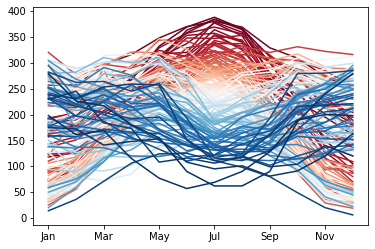

In [9]:
#trend line for sunshine by country
fig = sunshine_by_country.drop('Year', axis=1).sort_values('Jul', ascending=False).T.plot(cmap='RdBu', legend=False)
fig

# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [10]:
sunshine_by_country1 = sunshine_by_country.copy()
happiness1 = happiness.copy()

#fips codes
fips_codes = pd.read_excel("https://github.com/ContextLab/storytelling-with-data/raw/master/data-stories/happy-sun/countryFIPS.xlsx").drop('ISO 3166-1', axis = 1)

#add fips code to data frame
def add_fips(df, fips_name = 'fips'):
  def lookup_fips(country):
    try:
      return fips_codes.query(f'`Country name` == "{country}"')['FIPS 10-4'].values[0]
    except IndexError:
      return np.nan

  df[fips_name] = df['Country'].apply(lookup_fips)
  return df

sunshine_by_country1 = add_fips(sunshine_by_country1.reset_index()).set_index('Country')
happiness1 = add_fips(happiness1.reset_index()).set_index('Country')

In [11]:
happiness1.head()

,index,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,fips
Country,,,,,,,,,,
Finland,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FI
Denmark,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DK
Norway,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NO
Iceland,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,IC
Netherlands,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NL


In [12]:
stacked_sunshine = pd.concat(12 * [pd.DataFrame(index=sunshine_by_country1.index, columns=['Month', 'Hours of sun', 'fips'])], axis=0)
stacked_sunshine['fips'] = pd.concat(12 * [pd.DataFrame(sunshine_by_country1['fips'])])

In [13]:
for i, month in enumerate(sunshine_by_country.columns):
  if i >= 12:
    break

  start_ind = i * len(sunshine_by_country.index)
  end_ind = (i + 1) * len(sunshine_by_country.index)

  stacked_sunshine.iloc[start_ind:end_ind, 1] = sunshine_by_country1.iloc[:, i]
  stacked_sunshine.iloc[start_ind:end_ind, 0] = sunshine_by_country1.columns[i]

In [14]:
stacked_sunshine['Hours of sun'] = stacked_sunshine['Hours of sun'].apply(float)
stacked_sunshine

,Month,Hours of sun,fips
Country,,,
Afghanistan,Jan,177.0,AF
Albania,Jan,124.0,AL
Algeria,Jan,223.0,AG
Angola,Jan,219.0,AO
Argentina,Jan,252.0,AR
...,...,...,...
Uzbekistan,Dec,105.0,UZ
Venezuela,Dec,243.0,NaN
Vietnam,Dec,167.0,NaN


In [15]:
px.choropleth(stacked_sunshine.reset_index(), locations='Country', locationmode='country names',
              color='Hours of sun', animation_frame='Month', color_continuous_scale='rdbu_r',
              range_color=(0, 450))

In [16]:
sunshine_by_country1['Hours_sun_per_year'] = sunshine_by_country1['Year']

px.choropleth(sunshine_by_country1.reset_index(), locations='Country', locationmode='country names',
              color='Hours_sun_per_year', color_continuous_scale='rdbu_r')

In [17]:
happiness1

,index,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,fips
Country,,,,,,,,,,
Finland,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FI
Denmark,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DK
Norway,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NO
Iceland,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,IC
Netherlands,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NL
...,...,...,...,...,...,...,...,...,...,...
Rwanda,151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RW
Tanzania,152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,NaN
Afghanistan,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AF


In [18]:
px.choropleth(happiness1.reset_index(), locations='Country', locationmode='country names',
              color='Score', color_continuous_scale='rdbu')

In [19]:
px.choropleth(happiness1.reset_index(), locations='Country', locationmode='country names',
              color='GDP per capita', color_continuous_scale='rdbu')

In [20]:
sunshine_by_country = pd.DataFrame(np.round(pd.DataFrame(sunshine.groupby('Country').mean()), decimals=0), dtype=int)
sunshine_by_country.describe

<bound method NDFrame.describe of              Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  Year
Country                                                                      
Afghanistan  177  179  204  232  310  353  357  340  304  283  253  182  3175
Albania      124  125  165  191  263  298  354  327  264  218  127   88  2544
Algeria      223  220  262  292  324  312  353  325  262  270  225  204  3266
Angola       219  208  213  199  233  223  175  150  145  164  199  212  2341
Argentina    252  220  200  179  150  118  122  156  168  207  228  240  2240
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...
Uzbekistan   118  127  164  216  304  363  384  366  300  226  150  105  2824
Venezuela    265  248  261  220  213  218  256  248  243  247  234  243  2895
Vietnam      178  168  190  185  204  182  196  175  162  158  157  167  2124
Zambia       181  169  221  254  286  278  301  307  289  274  223  183  2965
Zimbabwe     231  202  242  25

In [21]:
x1 = happiness[['Country', 'Score']].set_index('Country').rename({'Score': 'Happiness'}, axis=1)
x2 = pd.DataFrame(sunshine_by_country['Year']).rename({'Year': 'Hours of sun per year'}, axis=1)

In [22]:
x3 = pd.concat([x1, x2], join='inner', axis=1)
x3

,Happiness,Hours of sun per year
Country,,
Finland,7.769,1858
Denmark,7.600,1739
Norway,7.554,1668
Iceland,7.494,1326
Netherlands,7.488,1662
...,...,...
Malawi,3.410,2796
Tanzania,3.231,3033
Afghanistan,3.203,3175


In [23]:
px.scatter(data_frame=x3, x='Hours of sun per year', y='Happiness', trendline = 'ols', trendline_color_override='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [24]:
column_happy = x3['Happiness']
column_sun = x3['Hours of sun per year']

correlation = column_sun.corr(column_happy)
correlation

-0.5087716064066599

# Interpretations and conclusions

Describe and discuss your findings and say how they answer your question (or how they failed to answer your question).  Also describe the current state of your project-- e.g., is this a "complete" story, or is further exploration needed?

# Future directions

The next steps in continuing this project likely include searching for correlations between various economic measures of a country's sucess and that country's happiness. Another strong direction for further exploration is to map where the the most and least sun is each month to create the ideal travel plans for someone who seeks to minimize or maximize their time in the sun. Since that would be on a country level, results could be skewed, especially for parts of Russia, Alaska, or Canada.